# Regression - Classification - Solvers - Performance_Metrics

\begin{exercise}
In this home quiz you must do the following:

1) Study the models presented here and their performance. This material will be part of QUIZ2.

2) Run all the models presented here for the following wine dataset.

\end{exercise}


In [4]:
import numpy as np
import pandas as pd

In [5]:
#Let's import the data from sklearn
from sklearn.datasets import load_wine
wine=load_wine()

#Conver to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
# STEP 1 - Loading the iris data set
from sklearn import datasets

iris = datasets.load_iris()

# STEP 2 - Defining the predictors and target variable
X = iris.data
y = iris.target

# STEP 3 - Splitting the data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.3, random_state=20052017)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=20052017)

# STEP 4 - Importing and fitting the model
from sklearn.ensemble import BaggingClassifier

iris_BC = BaggingClassifier(n_estimators=100, max_features=3, random_state=0)
BC = iris_BC.fit(X_train,y_train)

# STEP 5 - Calculating the score of the model using the test data
BC.score(X_test,y_test)


0.9555555555555556

# PART 1 - CLASSIFICATION AND REGRESSION TREES (CART)
- Set of supervised learning models used for problems involving classification and regression

## Classification Tree
- Sequence of if-else questions about individual features
- Objective: Infer class labels
- Able to capture non-linear relationships between features and labels
- Don't require feature scaling. For example, it do not need standardization etc.

## Decision regions 
- Decision region is the region in the feature space where all the instances are assigned to one class label.
- For example, if result is of two class Pass or Fail. Then there will be 2 decision region. One is Pass region other is Fail region.

## Decision boundary
- It is the seperating boundary between two region.
- In above example, decision boundary will be 33% (which is the passing marks)

## Logistic regression vs classification tree
- A classification tree divides the feature space into rectangular regions.
- In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.
- In other word, decision boundary produced by logistic regression is linear (line) while the boundaries produced by the classification tree divide the feature space into rectangular regions (Not a line but boxes/region it divides two class).

## Building block of Decision Tree 
- Root: No parent node, question giving rise to two children nodes.
- Internal node: One parent node, question giving rise to two children nodes.
- Lead: One parent node, no children node -> Prediction.

## Classication-Tree Learning (Working) - 
- Nodes are grown recursively (based on last node).
- At each node, split the data based on:
1. feature f and split-point(sp) to maximize IG(Information gain from each node).
2. If IG(node)= 0, declare the node a leaf.

## Information Gain-
- IG is a synonym for Kullback–Leibler divergence.
- It is the amount of information gained about a random variable or signal from observing another random variable.
- The term is sometimes used synonymously with mutual information, which is the conditional expected value of the Kullback–Leibler divergence.
- KL divergance is the univariate probability distribution of one variable from the conditional distribution of this variable given the other one.

## Criteria to measure the impurity of a node I(node):
1. Variance (Regression) [Variance reduction of a node N is defined as the total reduction of the variance of the target variable x due to the split at this node]
2. Gini impurity (Classification) [Measure of impurity. Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset]
3. Entropy (Classification) [Measure of purity. Information entropy is the average rate at which information is produced by a stochastic source of data]

Note 
- Most of the time, the gini index and entropy lead to the same results.
- The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn

## Regression Tree Classification
- Measurement are done through MSE (Mean Square error)
- Information Gain is the MSE. So the target variable will have the Mean Square Error.
- Regression trees tries to find the split that produce the leaf where in each leaf, the target value are an average of closest possible to the mean value of labels in that leaf.

# PART 2 - BIAS VARIANCE TRADEOFF

## Supervised Learning
- y = f(x), f is the function which is unknown
- Our model output will be that function
- But that function may contains various type of error like noise

## Goals of Supervised Learning
- Find a model f1 that best approximates f: f1 ≈ f ()
- f1 can be LogisticRegression, Decision Tree, Neural Network ...
- Discard noise as much as possible.
- End goal:f1 should acheive a low predictive error on unseen datasets.

## Dificulties in Approximating f
- Overtting: f1(x) fits the training set noise.
- Undertting: f1 is not flexible enough to approximate f

## Generalization error 
- Generalization Error of f1 : Does f1 generalize well on unseen data?
- It can be decomposed as follows: Generalization Error of
- f1 = bias + variance + irreducible error

## Bias
- Bias: error term that tells you, on average, how much f1 ≠ f.
- High Bias lead to underfitting

## Variance
- Variance: tells you how much f is inconsistent over different training sets.
- High Variance lead to overfitting

- If we decrease Bias then Variance increase. Or Vice versa.

## Model Complexity
- Model Complexity: sets the flexibility of f1.
- Example: Maximum tree depth, Minimum samples per leaf etc etc.

## Bias Variance Tradeoff 
- It is the problem is in trying to simultaneously minimize these two sources of error that prevent supervised learning algorithms from generalizing beyond their training set.

## Estimating the Generalization Error, Solution:
- Split the data to training and test sets 
- Fit t1 to the training set
- Evaluate the error of f1 on the unseen test set
- Generalization error of f1 ≈ test set error of f1.

## Better Model Evaluation with Cross-Validation
- Test set should not be touched until we are confident about f1's performance.
- Evaluating f1 on training set: biased estimate,f1 has already seen all training points.
- Solution → K Cross-Validation (CV)

## Diagnose Variance Problems
- If f1 suffers from high variance: CV error of f1 > training set error of f1.
- f1 is said to overfit the training set. To remedy overtting:
- decrease model complexity
- for ex: decrease max depth, increase min samples per leaf
- gather more data

## Diagnose Bias Problems
- If f1 suffers from high bias: CV error of f1 ≈ training set error of f1 >> desired error.
- f1 is said to underfit the training set. To remedy underfitting:
- increase model complexity
- for ex: increase max depth, decrease min samples per leaf
- gather more relevant features

## Limitations of CARTs
- Classification: can only produce orthogonal decision boundaries.
- Sensitive to small variations in the training set.
- High variance: unconstrained CARTs may overt the training set.
- Solution: ensemble learning.

## Ensemble Learning
- Train different models on the same dataset.
- Let each model make its predictions.
- Meta-model: aggregates predictions of individual models.
- Final prediction: more robust and less prone to errors.
- Best results: models are skillful in different ways.

## Steps in Ensemble learning 
1. Training set is fed to different classifier like Decision tree, Logistic regression, KNN etc.
2. Each classifier learn its parameter and make prediction
3. Each prediction are fed into another model and that model make final prediction.
4. That final model is known as ensemble model.

# PART 3 - BAGGING AND RANDOM FOREST

## Bagging
- Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data
- In bagging, it uses same algorithm (only one algo is used)
- However the model is not training on entire training set
- Instead each model is trained on different subset of data
- Bagging: Bootstrap Aggregation.
- Uses a technique known as the bootstrap.
- Reduces variance of individual models in the ensemble.
- For example, suppose a training dataset contains 3 parts - a,b,c.
- It create subset by method sample by replacement. For example aaa,aab,aba,acc,aca etc.
- On this subset, the models are trained.

## Bagging Classication
- Aggregates predictions by majority voting (Final model is selected by voting).
- BaggingClassifier in scikit-learn.

## Bagging Regression
- Aggregates predictions through averaging (Final model is selected by avergaing).
- BaggingRegressor in scikit-learn.

## Bagging limitations
- Some instances may be sampled severaltimes for one model,
- Other instances may not be sampled at all.

## Out Of Bag (OOB) instances
- On average,for each model, 63% ofthe training instances are sampled.
- The remaining 37% constitute the OOB instances.
- Since OOB instances are not seen by the model during training.
- This can be used to estimate the performance of the model without the need of cross validation.
- This technique is known as OOB evaluation

## Random Forest
- Another ensemble model
- Base estimator: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- d features are sampled at each node without replacement ( d < total number of features)

## Random Forests Classication:
- Aggregates predictions by majority voting
- RandomForestClassifier in scikit-learn

## Random Forests Regression:
- Aggregates predictions through averaging
- RandomForestRegressor in scikit-learn

## Feature Importance
- Tree-based methods: enable measuring the importance of each feature in prediction.
- In sklearn :
- how much the tree nodes use a particular feature (weighted average) to reduce impurity
- accessed using the attribute feature_importance_

# Part 4 BOOSTING

- Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. 
- Boosting: Ensemble method combining several weak learners to form a strong learner.
- Weak learner: Model doing slightly better than random guessing.
- Example of weak learner: Decision stump (CART whose maximum depth is 1).
- Train an ensemble of predictors sequentially.
- Each predictor tries to correct its predecessor.
- Most popular boosting methods: AdaBoost, Gradient Boosting.

## Adaboost
- Stands for Adaptive Boosting.
- Each predictor pays more attention to the instances wrongly predicted by its predecessor.
- Achieved by changing the weights of training instances.
- Each predictor is assigned a coefficient α.
- α depends on the predictor's training error
- Learning rate: 0 < η ≤ 1. It help to shrink coeeficient α. It is the tradeoff between η and number of estimator.
- Smaller number of η should be compensiated by high number of estimator.

## AdaBoost Classication
- Weighted majority voting.
- In sklearn: AdaBoostClassifier.

## AdaBoost Regression
- Weighted average.
- In sklearn: AdaBoostRegressor.

## Gradient Boosted Trees
- Sequential correction of predecessor's errors.
- Does not tweak the weights of training instances.
- Fit each predictor is trained using its predecessor's residual errors as labels.
- Gradient Boosted Trees: a CART is used as a base learner.

## Gradient Boosted Regression:
- y = y + ηr + ... + ηr
- In sklearn: GradientBoostingRegressor .

## Gradient Boosted Classication:
- In sklearn: GradientBoostingClassifier .

## Gradient Boosting: Cons
- GB involves an exhaustive search procedure.
- Each CART is trained to find the best split points and features.
- May lead to CARTs using the same split points and maybe the same features.

## Stochastic Gradient Boosting
- Each tree is trained on a random subset of rows of the training data.
- The sampled instances (40%-80% ofthe training set) are sampled without replacement.
- Features are sampled (without replacement) when choosing split points.
- Result: further ensemble diversity.
- Effect: adding further variance to the ensemble oftrees.

# PART 5 - MODEL TUNING

- The hyperparameters of a machine learning model are parameters that are not learned from data.
- They should be set prior to fitting the model to the training set.

## Parameters
- learned from data
- CART example: split-point of a node, split-feature of a node, ...

## Hyperparameters
- not learned from data, set prior to training
- CART example: max_depth , min_samples_leaf , splitting criterion ...

## What is hyperparameter tuning?
- Problem: search for a set of optimal hyperparameters for a learning algorithm.
- Solution: find a set of optimal hyperparameters that results in an optimal model.
- Optimal model: yields an optimal score.
- Score: in sklearn defaults to accuracy (classication) and R-squared (regression).
- Cross validation is used to estimate the generalization performance.

## Why tune hyperparameters?
- In sklearn, a model's default hyperparameters are not optimal for all problems.
- Hyperparameters should be tuned to obtain the best model performance.

## Approaches to hyperparameter tuning
- Grid Search
- Random Search
- Bayesian Optimization
- GeneticAlgorithms etc.

## Grid search cross validation
- Manually set a grid of discrete hyperparameter values.
- Set a metric for scoring model performance.
- Search exhaustively through the grid.
- For each set of hyperparameters, evaluate each model's CV score.
- The optimal hyperparameters are those ofthe model achieving the best CV score.

## Grid search cross validation: example
- Hyperparameters grids:
- max_depth = {2,3,4},
- min_samples_leaf = {0.05, 0.1}
- hyperparameter space = { (2,0.05) , (2,0.1) , (3,0.05), ... }
- CV scores = { score , ... }
- optimal hyperparameters = set of hyperparameters corresponding to the best CV score.

Tuning a RF's Hyperparameters
- Tuning is expensive

## Hyperparameter tuning:
- computationally expensive,
- sometimes leads to very slight improvement,
- Weight the impact oftuning on the whole project.

 # PART VI - PROBABILISTIC CLASSIFIERS
 
 ## Classification Problem
 
 * Given: $N$ labeled training examples $\left\{\bf {x}_{n}, y_{n}\right\}_{n=1}^{N}, \bf{x}_{n} \in \mathbb{R}^{D}, y_{n} \in\{0,1\}$

* $\mathrm{X}: N \times D$ feature matrix, $\mathbf y: N \times 1$ label vector

* $y_{n}=1:$ positive example, $y_{n}=0:$ negative example

* Goal: Learn a classifier (determine the parameters $\omega$ of a function $h(\bf x,\omega)$) that is used to predict the binary label $y_{*}$ for a new input $\bf x_{*}$

* Often we don't just care about predicting the label $y$ for an example

- Rather, we want to predict the label probabilities $P(y \mid \bf {x}_{n}, \bf \omega)$

    - E.g., $P(y = +1 \mid \bf {x}_{n}, \bf \omega)$: the probability that the label is $+1$
    
    - In a sense, it's our confidence in the predicted label
    
- Probabilistic classification models allow us do that

* Want a **probabilistic** model to be able to also predict the _*label probabilities*_

$$
\begin{array}{l}
{p\left(y_{n}=1 | \bf {x}_{n}, \bf{\omega}\right)=\mu_{n}} \\
{p\left(y_{n}=0 | \bf {x}_{n}, \bf{\omega}\right)=1-\mu_{n}}
\end{array}
$$

* $ \mu_{n} \in(0,1)$ is the probability of $y_{n}$ being 1

* Note: Features $\mathbf x_{n}$ assumed fixed (given). Only labels $y_{n}$ being modeled

* $\mathbf w$ is the model parameter (to be learned)

* How do we define $\mu_{n}$ (want it to be a function of $\mathbf {\omega}$ and input $\bf x_{n}$ )?
 

 ## Logistic regression
 
 

- Often we don't just care about predicting the label $y$ for an example

- Rather, we want to predict the label probabilities $P(y \mid X, \omega)$

    - E.g., $P(y = +1 \mid X, \omega)$: the probability that the label is $+1$
    
    - In a sense, it's our confidence in the predicted label
    
- Probabilistic classification models allow us do that

- Consider the following function $(y = -1/+1)$:

$$P(y \mid X, \omega) = \sigma(y\omega^TX) = \frac{1}{1 + \exp(-y\omega^TX)}$$


- $\sigma$ is the logistic function which maps all real number into $(0,1)$

- This is the Logistic Regression model

    - Misnomer: Logistic Regression is a classification model
 
 

- What does the decision boundary look like for Logistic Regression?

- At the decision boundary labels $+1/-1$ becomes equiprobable

\begin{align*}
P(y= + 1 \mid x, \omega) &= P(y = -1 \mid x, \omega)\\
\frac{1}{1+\exp(-\omega^TX)} &= \frac{1}{1+\exp(\omega^TX)}\\
\exp(-\omega^TX) &= \exp(\omega^TX)\\
\omega^TX&= 0
\end{align*}

- The decision boundary is therefore linear $\implies$ Logistic Regression is a linear classifier (note: it's possible to kernelize and make it nonlinear)

## Maximum Likelihood Solution

- Goal: Want to estimate $\omega$ from the data $D = \{ (x_1, y_1), \cdots, (x_m, y_m)\}$


- Log-likelihood:

\begin{align*}
\log L(\omega) = \log P(D \mid \omega) = \log P(Y \mid X, \omega) &= \log\prod\limits^m_{n=1}P(y_n \mid x_n, \omega)\\
&= \sum^m_{n=1}\log P(y_n \mid x_n, \omega)\\
&= \sum^m_{n=1}\log \frac{1}{1+\exp(-y_n\omega^Tx_n)}\\
&= \sum^m_{n=1}-\log\left[1+\exp(-y_n\omega^Tx_n)\right]
\end{align*}

- Maximum Likelihood Solution: 

$$\hat{\omega}_{MLE} = \arg\max_{\omega}\log L(\omega)$$

- No closed-form solution exists but we can do gradient descent on $\omega$

\begin{align*}
\nabla_{\omega} \log L(\omega) &= \sum^m_{n=1} -\frac{1}{1 + \exp\left(-y_n\omega^Tx_n\right)}\exp\left(-y_n\omega^Tx_n\right)(-y_nx_n)\\
&= \sum^m_{n=1} \frac{1}{1 + \exp\left(y_n\omega^Tx_n\right)}y_nx_n
\end{align*}

## Maximum-a-Posteriori Solution

- Let's assume a Gaussian prior distribution over the weight vector $\omega$

$$P(\omega) = N(\omega \mid 0, \lambda^{-1}I) = \frac{1}{(2\pi)^{D/2}}\exp\left( -\frac{\lambda}{2} \omega^T\omega \right)$$

- Maximum-a-Posteriori Solution: 

\begin{align*}
\hat{\omega}_{MAP} &= \arg\max_{\omega} \log P(\omega \mid D) \\
&= \arg\max_{\omega}\{\log P(\omega) + \log P(D \mid \omega) - \underbrace{\log P(D)}_{\text{constant}} \}&\\
&= \arg\max_{\omega}\{\log P(\omega) + \log P(D \mid \omega)\}&\\
&= \arg\max_{\omega}\bigg\{ -\frac{D}{2}\log (2\pi) - \frac{\lambda}{2}\omega^T\omega + \sum\limits^m_{n=1} - \log\left[1 + \exp\left(-y_n\omega^Tx_n\right)\right] \bigg\}&\\
&= \arg\min_{\omega}\sum\limits^m_{n=1} \log\left[1 + \exp\left(-y_n\omega^Tx_n\right)\right] + \frac{\lambda}{2}\omega^T\omega \quad \text{ (ignoring constants and changing max to min)}&
\end{align*}

- BIG Lesson: MAP $= l_2$ norm regularization


- No closed-form solution exists but we can do gradient descent on $\omega$


- See “[A comparison of numerical optimizers for logistic regression](http://research.microsoft.com/en-us/um/people/minka/papers/logreg/minka-logreg.pdf)” by Tom Minka on optimization techniques (gradient descent and others) for logistic regression (both MLE and MAP)

## The Naive Bayes Classifier



Let us use Bayes theorem, to express the classifier as

$$\hat{y} = \mathrm{argmax}_y \> p(y  \mid  \mathbf{X}) = \mathrm{argmax}_y \> \frac{p( \mathbf{X}  \mid  y) p(y)}{p(\mathbf{X})}.$$

Note that the denominator is the normalizing term $p(\mathbf{X})$ which does not depend on the value of the label $y$. As a result, we only need to worry about comparing the numerator across different values of $y$. Even if calculating the denominator turned out to be intractable, we could get away with ignoring it, so long as we could evaluate the numerator. Fortunately, even if we wanted to recover the normalizing constant, we could.  We can always recover the normalization term since $\sum_y p(y  \mid  \mathbf{X}) = 1$.

Now, let us focus on $p( \mathbf{X}  \mid  y)$ and assume that $X =\{x_i\}_{d=1}^d$. Using the chain rule of probability, we can express the term $p( \mathbf{X}  \mid  y)$ as

$$p(x_1  \mid y) \cdot p(x_2  \mid  x_1, y) \cdot ... \cdot p( x_d  \mid  x_1, ..., x_{d-1}, y).$$

By itself, this expression does not get us any further. We still must estimate roughly $2^d$ parameters. However, if we assume that *the features are conditionally independent of each other, given the label*, then suddenly we are in much better shape, as this term simplifies to $\prod_i p(x_i  \mid  y)$, giving us the predictor

$$\hat{y} = \mathrm{argmax}_y \> \prod_{i=1}^d p(x_i  \mid  y) p(y).$$

If we can estimate $p(x_i=1  \mid  y)$ for every $i$ and $y$, and save its value in $P_{xy}[i, y]$, here $P_{xy}$ is a $d\times n$ matrix with $n$ being the number of classes and $y\in\{1, \ldots, n\}$, then we can also use this to estimate $p(x_i = 0 \mid y)$, i.e.,

$$ 
p(x_i = t_i \mid y) = 
\begin{cases}
    P_{xy}[i, y] & \text{for } t_i=1 ;\\
    1 - P_{xy}[i, y] & \text{for } t_i = 0 .
\end{cases}
$$

In addition, we estimate $p(y)$ for every $y$ and save it in $P_y[y]$, with $P_y$ a $n$-length vector. Then, for any new example $\mathbf t = (t_1, t_2, \ldots, t_d)$, we could compute

$$\begin{aligned}\hat{y} &= \mathrm{argmax}_ y \ p(y)\prod_{i=1}^d   p(x_t = t_i \mid y) \\ &= \mathrm{argmax}_y \ P_y[y]\prod_{i=1}^d \ P_{xy}[i, y]^{t_i}\, \left(1 - P_{xy}[i, y]\right)^{1-t_i}\end{aligned}$$
:eqlabel:`eq_naive_bayes_estimation`

for any $y$. So our assumption of conditional independence has taken the complexity of our model from an exponential dependence on the number of features $\mathcal{O}(2^dn)$ to a linear dependence, which is $\mathcal{O}(dn)$.


## Training

The problem now is that we do not know $P_{xy}$ and $P_y$. So we need to estimate their values given some training data first. This is *training* the model. Estimating $P_y$ is not too hard. 


# Part I - Classification and Regression Trees (CART)

In [7]:
# CLASSIFICATION
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,stratify=y,random_state=1)

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion= 'gini', random_state=1)

# Instantiate dt, set 'entropy' as the information criterion
dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

# Most of the time, the gini index and entropy lead to the same results.
# The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn

# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Evaluate test-set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

# REGRESSION
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)

# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)
# 0.1 implies Atleast 10% of the training data

# Fit 'dt' to the training-set
dt.fit(X_train, y_train)

# Predict test-set labels
y_pred = dt.predict(X_test)

# Compute test-set MSE
mse_dt = MSE(y_test, y_pred)

# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print(rmse_dt)
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))


Test set accuracy: 0.97
0.21136680421940887
Test set RMSE of dt: 0.21


# Part 2 - Bias Variance Tradeoff

In [8]:
#K-Fold CV in regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

# Set seed for reproducibility
SEED = 123

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=SEED)

# Instantiate decision tree regressor and assign it to 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=SEED)

# Evaluate the list of MSE ontained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv= 10, scoring= 'neg_mean_squared_error' , n_jobs = -1)

# Fit 'dt' to the training set
dt.fit(X_train, y_train)

# Predict the labels of training set
y_predict_train = dt.predict(X_train)
y_predict_train

# Predict the labels of test set
y_predict_test = dt.predict(X_test)

# CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

# Suppose CV MSE = 20.51, Train MSE = 15.30 and Test MSE = 20.92
# Train MSE < CV MSE.
# Suggested that model is overfit and is suffering from high variance.
# CV MSE and Test MSE are roughly equal

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV.mean())**(1/2)
# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV MSE: 0.08
Train MSE: 0.03
Test MSE: 0.03
CV RMSE: 0.28


In [9]:
# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_predict_train))**(1/2)
# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

# Suppose, RMSE_CV = 5.14, RMSE_train = 5.15 and baseline_RMSE = 5.1
# RMSE_CV < RMSE_train means dt suffers from high bias because RMSE_CV ≈ RMSE_train and both scores are greater than baseline_RMSE.
# dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels


# Ensemble Learning
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)

# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  
  #fit clf to the training set
  clf.fit(X_train, y_train)
  
  # Predict the labels of the test set
  y_pred = clf.predict(X_test)
  
  # Evaluate the accuracy of clf on the test set
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
  
# OR 
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)   
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))  



Train RMSE: 0.18
Logistic Regression : 0.978
K Nearest Neighbours : 0.978
Classification Tree : 0.956
Logistic Regression : 0.978
K Nearest Neighbours : 0.978
Classification Tree : 0.956
Voting Classifier: 0.978


# Part 3 - Bagging and Random Forest  

Accuracy of Bagging Classifier: 0.978
Test set accuracy: 0.978
OOB accuracy: 0.905
Test set RMSE of rf: 0.17


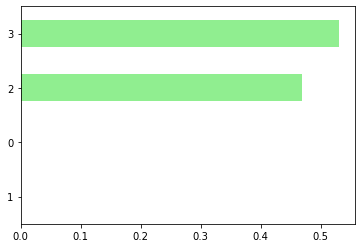

In [10]:
# BAGGING CLASSIFICATION
# Import models and utility functions

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))


# OOB EVALUATION IN SKLEARN
# Import models and split utility function
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify= y, random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'; set oob_score= True
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

# Fit 'bc' to the traing set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))
# The difference between test and oob accuracy will be minimal which proved that we don't need cross validation to check the model accuracy


# RANDOM FOREST REGRESSOR
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


# FEATURE IMPORTANCE in sklearn

import pandas as pd
import matplotlib.pyplot as plt
X_train = pd.DataFrame(X_train)
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X_train.columns)

#importances_rf = pd.DataFrame(rf.feature_importances_,
#                                   index = X_train.columns,
#                                    columns=['importance']).sort_values('importance',  
#ascending=False)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind= 'barh', color= 'lightgreen'); 
plt.show()


# Part 4 - Boosting

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

The classes in this data are [0 1 2]
Training set are 105 samples  and Test set are 45 samples

After standardizing our features,data looks like as follows:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


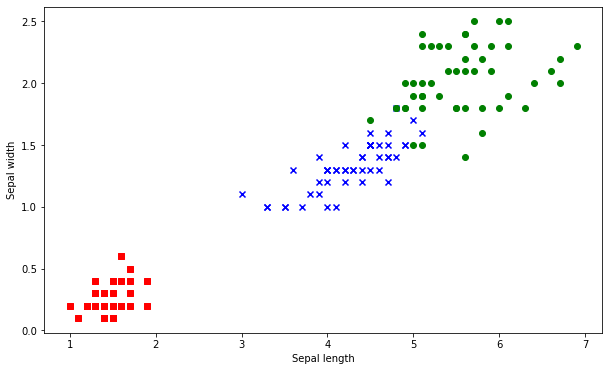

The training accuracy is 95.24%
The test accuracy is 93.33%


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


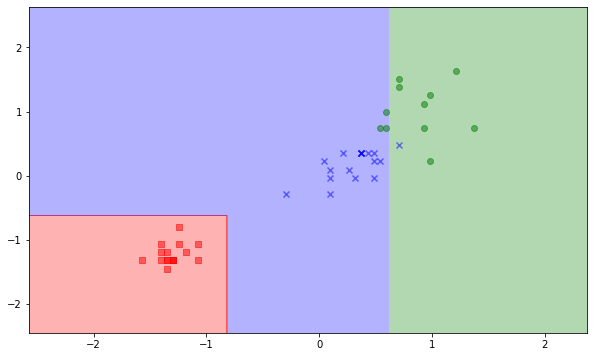

In [14]:

"""
This class uses AdaBoost on Iris Dataset and Visiualize the data before and after prediction 
"""
#!/usr/bin/env python3
# Import data and modules
import pandas as pd
import numpy as np
from sklearn import datasets
import pylab
import matplotlib.pyplot as plt 
pylab.rcParams['figure.figsize'] = (10, 6)
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

import warnings

def main():
    ## Load the iris data 
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test,iris_df, X,y=get_data(iris)
    X_train_std,X_test_std=scale_data(X_train,X_test,iris_df)
    show_data(y_test,X,y)
    classification=Adaboost(X_train_std,y_train, X_test_std, y_test)
    classification.perform_adaboost(X_train_std, y_train, X_test_std, y_test)
    
def get_data(iris):
# Only petal length and petal width considered
    X = iris.data[:, [2, 3]]
    
    y = iris.target
    
# Place the iris data into a pandas dataframe
    iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])

# View the data
    print(iris_df.head())

# Print the classes of the dataset
    print('\n' + 'The classes in this data are ' + str(np.unique(y)))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

    print('Training set are {} samples  and Test set are {} samples'.format(
    X_train.shape[0], X_test.shape[0]))
    print()
    return(X_train, X_test, y_train, y_test,iris_df, X,y)
##scale the training data before training
def scale_data(X_train,X_test,iris_df):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    print('After standardizing our features,data looks like as follows:\n')
    print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())
    return(X_train_std,X_test_std)
##visualization of the data before training     
def show_data(y_test,X,y):
    ##There are 3 classes
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y_test))])
    for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   c=cmap(idx), marker=markers[idx], label=cl)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()
##Adaboost Class
class Adaboost(object):
   
    def __init__(self,X_train_std,y_train,X_test_std, y_test):
        self.X_train_std=X_train_std
        self.y_train=y_train
        self.X_test_std=X_test_std
        self.y_test=y_test
    def perform_adaboost(self,X_train_std,y_train,X_test_std, y_test): ##perform adaboost
     
        ada = AdaBoostClassifier(n_estimators=10)
        ada.fit(X_train_std, y_train)
        train_score=cross_val_score(ada,X_train_std, y_train)
        print('The training accuracy is {:.2f}%'.format(train_score.mean()*100))
        test_score=cross_val_score(ada,X_test_std, y_test)
        print('The test accuracy is {:.2f}%'.format(test_score.mean()*100))
        X=X_test_std
        y=y_test
        resolution=0.01
        #Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'green', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y_test))])
        X=X_test_std
        y=y_test    
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

        Z = ada.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.5, c=cmap(idx),
                    marker=markers[idx], label=cl)
        plt.show()

if __name__=="__main__":
    main()



In [15]:
#loading the dataset
from sklearn import datasets

iris = datasets.load_iris()
X=iris.data
y=iris.target

#training the model
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

#applying Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
classifier=AdaBoostClassifier(n_estimators=30,learning_rate=1)
adaboost=classifier.fit(X_train,y_train)
y_pred=adaboost.predict(X_test)

#calculating the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred))
# Evaluate test-set roc_auc_score
#roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')


# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.3f}'.format(roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')))

Accuracy:  0.9473684210526315
ROC AUC score: 0.987


In [16]:
# AdaBoost Classication with Decision Tree in sklearn
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

# Predict the test set probabilities of positive class
# Once the classifier adb_clf is trained, call the .predict_proba() method by passing X_test as a parameter 
# Extract these probabilities by slicing all the values in the second column as follows
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

In [17]:
# Evaluate test-set roc_auc_score
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

#adb_clf_roc_auc_score= roc_auc_score(y_test, y_pred_proba,multi_class='ovr' )

# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')))

ROC AUC score: 0.99


In [18]:
# Gradient Boosting in sklearn
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = gbt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))


# Stochastic Gradient Boosting in sklearn
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=SEED)

# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=SEED)
# 0.8 refers to sample 80% of datafor training
# 0.2 refers to each tree uses 20% of the available features to perform best split

# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = sgbt.predict(X_test)

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 0.18
Test set RMSE: 0.19


# Part 5 - Model Tuning 

In [ ]:
#Inspecting the hyperparameters of a CART
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Set seed to 1 for reproducibility
SEED = 1

# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)

# Print out 'dt's hyperparameters
print(dt.get_params())

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {
              'max_depth': [3, 4,5, 6],
              'min_samples_leaf': [0.04, 0.06, 0.08],
              'max_features': [0.2, 0.4,0.6, 0.8]
            }

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy'.format(best_CV_score))

# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
#y_pred_proba = best_model.predict_proba(X_test)[:,1]
y_pred_proba = best_model.predict_proba(X_test)
# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba,multi_class='ovr')
#roc_auc_score(y_test, y_pred_proba,multi_class='ovr')
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(roc_auc_score(y_test, y_pred_proba,multi_class='ovr')))


# Inspecting RF Hyperparameters in sklearn
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= SEED)

# Inspect rf' s hyperparameters
rf.get_params()

# Basic imports
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameter 'params_rf'
params_rf = {
                'n_estimators': [300, 400, 500],
                'max_depth': [4, 6, 8],
                'min_samples_leaf': [0.1, 0.2],
                'max_features': ['log2','sqrt']
            }

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,param_grid=params_rf, cv=3, scoring= 'neg_mean_squared_error',verbose=1, n_jobs=-1)

# Searching for the best hyperparameters
# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best model from 'grid_rf'
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


# Part 6 - Performance Metrics for Classification and Regression

## ROC Curve 
Scikit Learn has an easy way to create ROC curve and calculate the area under the ROC curve. First off, let’s start with a classifier like Logistic Regression and let it predict all the probabilities (thresholds).

In [ ]:
# get the data
from sklearn import datasets
 
iris = datasets.load_iris()
 
# Get only the setosa and versicolor data
iris_data = iris.data[0:100,:]
iris_target = iris.target[0:100]

In [ ]:
# apply a classifier - choose logistic regression
# split the data into train and test datasets
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split (iris_data[:,0], iris_target)
 
# Model the data using Logistic Regression
from sklearn import linear_model
 
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(iris_data[:,0].reshape(-1,1), iris_target)

In [ ]:
# Use roc_curve function to create the True Positive Rate and False positive Rate.

from sklearn.metrics import roc_curve, auc
 
probabilities = model.predict_proba(X_test.reshape(-1,1))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

In [ ]:
# Plot the ROC curve

import matplotlib.pyplot as plt
%matplotlib inline
 
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color="black",linestyle="--")
 
plt.xlabel("False Positive Rate - FPR")
plt.ylabel("True Positive Rate - TPR ")
plt.title("Receiver Operating Characteristics - ROC Curve")
plt.text(0.6,0.5,"Baseline")
plt.text(0.3,0.8,"ROC Curve")

In [3]:
# computes the area under the ROC curve
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

NameError: name 'roc_auc_score' is not defined

## Confusion Matrix

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
X_test =np.array(X_test).reshape(-1,1)
y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)

# Part 7 - Naive Bayes Classifier

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
#dataset
iris = pd.read_csv("iris.csv") # the iris dataset is now a Pandas DataFrame
iris.head()

In [ ]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)

In [ ]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

In [ ]:


# Next is a visual based on probability density , called kernel density plots. (KD Plots)

# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="species", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()



In [ ]:
#Dividing the data for training and testing

#Once we have understood what the dataset is about, we can start training a model based on the algorithms. Here, we will be implementing some of the commonly used algorithms in machine learning. Let us start by training our model with some of the samples. We will be using an inbuilt library called ‘train_test_split’ which divides our data set into a ratio of 80:20.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Seperating the data into dependent and independent variables
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)